In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('pima-indians-diabetes.csv', header = None)

print(data.head(5))

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


5/5 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.7208

accuracy: 72.08%


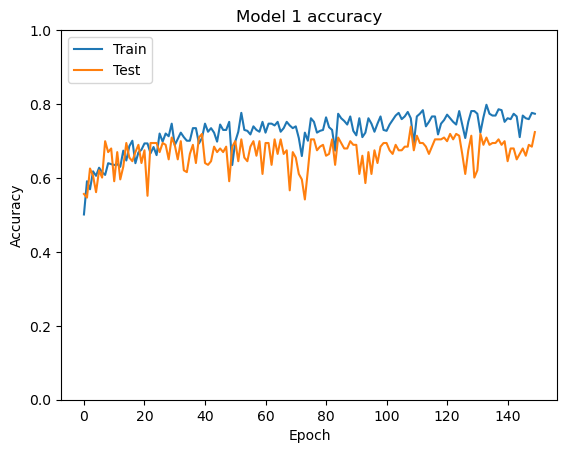

In [2]:
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


5/5 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7078

accuracy: 70.78%


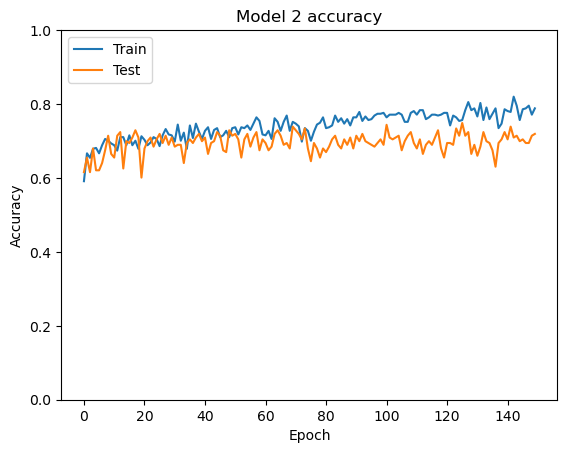

In [3]:
# Model 2
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

5/5 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6688

accuracy: 66.88%


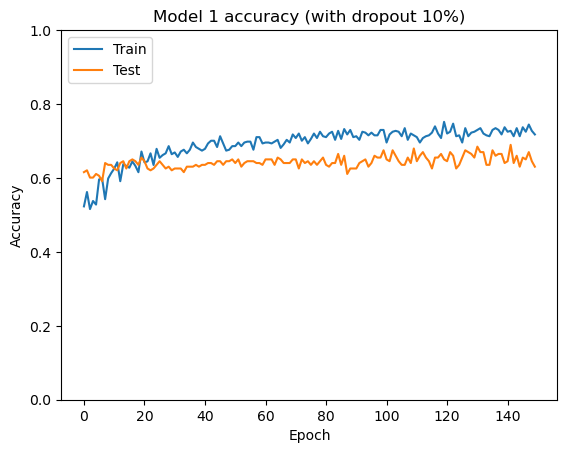

In [4]:
# Add Dropout 10% Model 1
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 1 accuracy (with dropout 10%)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

5/5 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.6429

accuracy: 64.29%


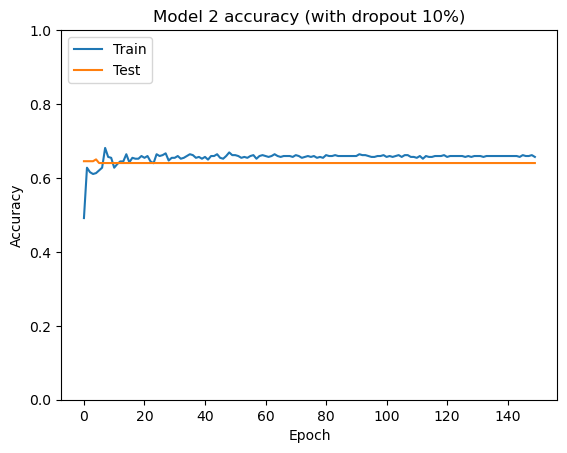

In [5]:
# Add Dropout 10% Model 2
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 2 accuracy (with dropout 10%)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()